In [0]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm
from sklearn.model_selection import train_test_split

In [2]:
url='https://raw.githubusercontent.com/fazlyrabbi77/Cancer-Prediction-Logistic-Regression/master/haberman.csv'
df = pd.read_csv(url)
df.head()

,age,operation_year,axil_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
features=['age','operation_year','axil_nodes']
X=df[features]
df['status']=df['status'].map({1:0, 2:1})
y=df.status

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [0]:
svm_ml = svm.SVC(kernel='linear').fit(X_train, y_train)

In [6]:
cv_svm = cross_validate(svm_ml, X, y, cv=10)
print(cv_svm['test_score'])
print(cv_svm['test_score'].mean())

[0.77419355 0.74193548 0.74193548 0.74193548 0.74193548 0.67741935
 0.73333333 0.73333333 0.7        0.73333333]
0.7319354838709677


In [7]:
score_df_svm=pd.DataFrame(cv_svm)
score_df_svm

,fit_time,score_time,test_score
0,0.045339,0.001379,0.774194
1,0.015945,0.001055,0.741935
2,0.060281,0.001242,0.741935
3,0.067589,0.001232,0.741935
4,0.052879,0.001236,0.741935
5,0.048168,0.001307,0.677419
6,0.022388,0.001001,0.733333
7,0.044829,0.001166,0.733333
8,0.055957,0.001171,0.700000
9,0.039291,0.001168,0.733333


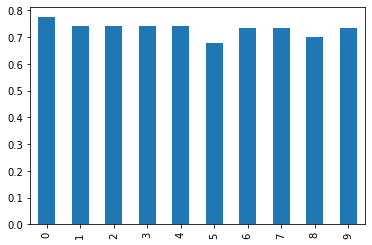

In [8]:
ax = score_df_svm.test_score.plot.bar()

In [9]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
cv_logit = cross_validate(logreg, X, y, cv=10)
print(cv_logit['test_score'])
print(cv_logit['test_score'].mean())

[0.74193548 0.80645161 0.77419355 0.74193548 0.74193548 0.67741935
 0.73333333 0.76666667 0.76666667 0.7       ]
0.7450537634408603
